### Import packages

In [4]:
import sys
sys.path.append('../')
import numpy as np
from gmm_mi import GMM, GMM_MI
from utils.synthetic_data import D3p as dataset
from utils.plotting import plot_gmm_contours, histogram_estimates, plot_loss_curves

### Calculate the true MI of the synthetic model, and plot contours

0.38892998866932643


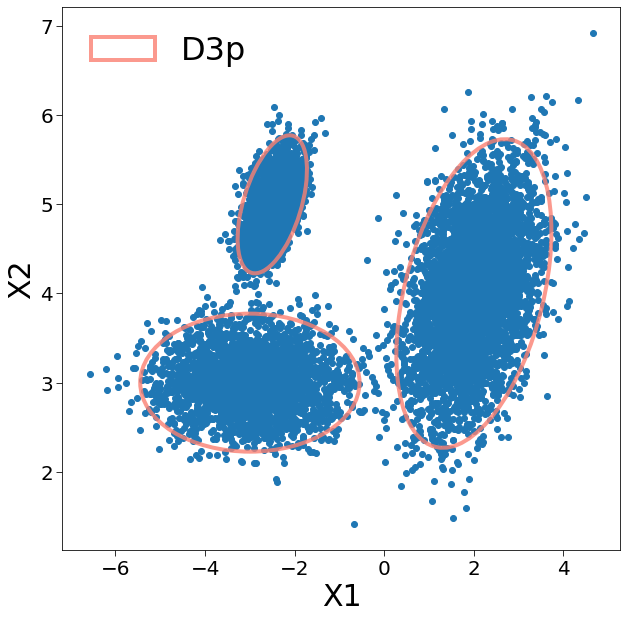

In [5]:
label = 'D3p'
# it will be probably wise to store these analytic values and simply load them
analytic = 0.38892998866932643#dataset.estimate_MI_MC(MC_samples=1e8)
print(analytic)
plot_gmm_contours(dataset, ls='-', label=label)

### Test on 500 trials

In [ ]:
N = 10000
random_states = 500

# probably make a yaml file for these parameters
# parameters to play with
n_inits = 10
n_folds = 5
init_type = 'random_sklearn'
MC_samples = 1e5
tol = 1e-6
reg_covar = 1e-15
max_iter = 10000
MC_samples = 1e5
bootstrap = False
fixed_components = True
n_bootstrap = 100
select_c = 'valid'
patience = 1
all_MI_estimates = np.zeros((random_states))

n_components = dataset.n_components 
true_weights = dataset.weights_
true_means = dataset.means_
true_covariances = dataset.covariances_

for r in range(random_states):
    
    X = GMM(n_components=n_components, weights_init=true_weights, 
                      means_init=true_means, covariances_init=true_covariances, 
                      random_state=r).sample(N)[0]

    MI_mean, _, lc = GMM_MI(X, n_folds=n_folds, n_inits=n_inits, 
                            init_type=init_type, reg_covar=reg_covar, tol=tol, max_iter=max_iter,
                            bootstrap=bootstrap, n_bootstrap=n_bootstrap, MC_samples=MC_samples, 
                            fixed_components=fixed_components, fixed_components_number=n_components, 
                            select_c=select_c, patience=patience)
    

    # print for debugging purposes
    print(r, MI_mean) 

    all_MI_estimates[r] = MI_mean

    # save, if needed
    #np.save('./D3p_bias_MI_test.npy', all_MI_estimates)

Convergence reached at 3 components
0 0.40650125063077175
Convergence reached at 3 components
1 0.3861457106698005
Convergence reached at 3 components
2 0.4060514892392266
Convergence reached at 3 components
3 0.3868341534935538
Convergence reached at 3 components
4 0.3853140576634863
Convergence reached at 3 components
5 0.3837393947179205
Convergence reached at 3 components
6 0.39663238171446913
Convergence reached at 3 components
7 0.3972974545198396
Convergence reached at 3 components
8 0.39205631149572967
Convergence reached at 3 components
9 0.39157891597733263
Convergence reached at 3 components
10 0.40183815573569925
Convergence reached at 3 components
11 0.3936393642812979
Convergence reached at 3 components
12 0.3987536106241153
Convergence reached at 3 components
13 0.387209385059313
Convergence reached at 3 components
14 0.3990235877772434
Convergence reached at 3 components
15 0.38765743887482995
Convergence reached at 3 components
16 0.3970884258125976
Convergence reached

Convergence reached at 3 components
140 0.39532085615288265
Convergence reached at 3 components
141 0.3877305194457807
Convergence reached at 3 components
142 0.39333603701772474
Convergence reached at 3 components
143 0.3908099342938933
Convergence reached at 3 components
144 0.3956676623217976
Convergence reached at 3 components
145 0.3884748729170823
Convergence reached at 3 components
146 0.3900951573719515
Convergence reached at 3 components
147 0.39181269256283735
Convergence reached at 3 components
148 0.3954528447593152
Convergence reached at 3 components
149 0.3994443895781569
Convergence reached at 3 components
150 0.3839943116499162
Convergence reached at 3 components
151 0.3971532276611591
Convergence reached at 3 components
152 0.39414514035561815
Convergence reached at 3 components
153 0.39039929470457624
Convergence reached at 3 components
154 0.4007485433893594
Convergence reached at 3 components
155 0.40143320133402655
Convergence reached at 3 components
156 0.39741699

Convergence reached at 3 components
279 0.3872237585540215
Convergence reached at 3 components
280 0.3715657002904171
Convergence reached at 3 components
281 0.391609162085301
Convergence reached at 3 components
282 0.37775328529104985
Convergence reached at 3 components
283 0.3948415561755196
Convergence reached at 3 components
284 0.37547804246635497
Convergence reached at 3 components
285 0.38488886845203
Convergence reached at 3 components
286 0.3879067852551232
Convergence reached at 3 components
287 0.39445304080340954
Convergence reached at 3 components
288 0.3777670157953198
Convergence reached at 3 components
289 0.38726328903583684
Convergence reached at 3 components
290 0.3854806298169933
Convergence reached at 3 components
291 0.39542650359691417
Convergence reached at 3 components
292 0.3839249084487697
Convergence reached at 3 components
293 0.3939670204932646
Convergence reached at 3 components
294 0.39029538359718036
Convergence reached at 3 components
295 0.40020275138

Convergence reached at 3 components
417 0.397640373100888
Convergence reached at 3 components
418 0.4010991901826199
Convergence reached at 3 components
419 0.3919016069923352
Convergence reached at 3 components
420 0.3981385586412093
Convergence reached at 3 components
421 0.3833312977853045
Convergence reached at 3 components
422 0.39121973310407826
Convergence reached at 3 components
423 0.39127378694573384
Convergence reached at 3 components
424 0.3898898794531942
Convergence reached at 3 components
425 0.38175285322017305
Convergence reached at 3 components
426 0.3865272522420147
Convergence reached at 3 components
427 0.39872878688571806
Convergence reached at 3 components
428 0.3909969850132929
Convergence reached at 3 components
429 0.3946099369259826
Convergence reached at 3 components
430 0.3876868962898786
Convergence reached at 3 components
431 0.3841881041448826
Convergence reached at 3 components
432 0.39231430439039666
Convergence reached at 3 components
433 0.3883243249

### Evaluate MI bias

In [ ]:
# load in case you saved it
#all_MI_estimates = np.load('./D3p_bias_MI_test.npy')

In [ ]:
histogram_estimates(all_MI_estimates - analytic, title=f'{label}, {random_states} trials, without bootstrap, correct number of components.')